# Outline: #
- Initialize
    - Imports
    - Definitions, variables, and dictionaries

In [1]:
%matplotlib widget
#%matplotlib inline

import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import time
import datetime

print('all libraries imported! c;')

all libraries imported! c;


In [14]:
# close plots
for i in range(1000):
    plt.close(i)

7


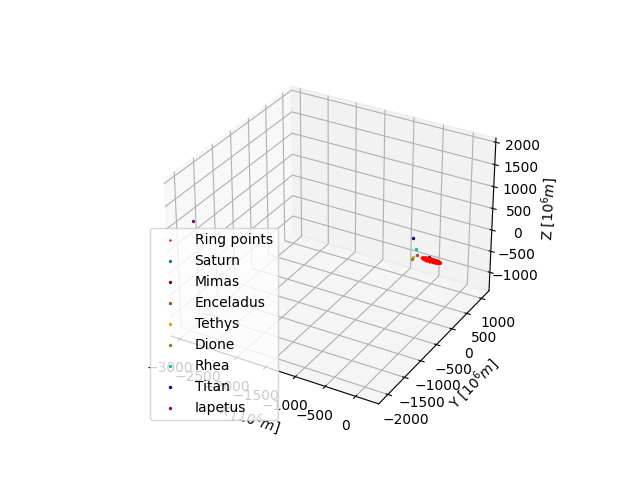

In [20]:
'''README
    Units:
Force: N
Distance: Mm (megameters)
Mass: Gg (Gigagrams)        

m   --> Mm  *e-6
kg  --> Gg  *e-6

Constants in new units from SI units:
Gravitational constant 6.6726e-11  N m2 kg-2        --> 6.6726e-11  N Mm2 Gg-2

'''
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / np.sqrt(np.dot(axis, axis))
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def initParameters(mode): #WHAT IS A GOOD WAY TO PASS MANY PARAMETERS INTO AN INITIALIZATION FUNCTION??
    global ParamsDict
    ParamsDict = {

        'numberOfMoons': mode[0].count(1),
        'moonsList': mode[0],
        'moonsOrbitShape': mode[1],
        'moonsOrbitType': mode[2],
        'ringParticleNumber': mode[3],
        'initialDistributionType': mode[4],
        'ringLimits': mode[5]
    }
    return None
def calculateRingPlaneDir():
    v1 = ConstantsDict.get('AegaeonElements')[0][0:3]
    v2 = ConstantsDict.get('AegaeonElements')[1][0:3]
    v1 = v1/np.sqrt(np.dot(v1,v1))
    v2 = v2/np.sqrt(np.dot(v2,v2))
    ringPlaneVector = np.cross(v1, v2)
    angle = np.arccos(np.dot(ringPlaneVector, [0,0,1])/np.sqrt(np.dot(ringPlaneVector,ringPlaneVector)))
    node = np.cross([0,0,1], ringPlaneVector)
    ConstantsDict.update({'angle': angle, 'node': node})
    return None

def initConstants(localMode):
    global ConstantsDict
    match localMode:
        case 'restricted':
            ConstantsDict = {
                'Gravitational Constant': 6.6726e-11,           #unreferenced
                'Saturn Mass': 5.6834e20,                       #from Horizon's Ephemeris, in gigagrams
                'Saturn Radius': 5.8232e1,                      #from Horizon's Ephemeris, in megameters
                'SaturnElements': np.array([ 1.95683334e-01, -2.07967708e-01,  8.89114822e-02,  1.00287582e-06,
        7.10261281e-07, -4.62358562e-07,  9.97617585e-07,  2.99078228e-01,
        2.48285806e-08]),
                'AegaeonElements': np.array([[ 1.62925749e+05,  2.62721373e+04, -2.95455149e+04,
        -3.33490571e+00,  1.31494109e+01, -6.56677155e+00,
         5.59234531e-01,  1.67654295e+05, -2.30249816e-02],
       [-2.38713706e+04,  1.47623071e+05, -7.50370575e+04,
        -1.48591023e+01, -1.34028152e+00,  2.14131733e+00,
         5.58089452e-01,  1.67311008e+05, -2.30249816e-02]]) #Aegaeon Elements to calculate ring angular momentum vector direction
            }
    calculateRingPlaneDir()
    return None

def initMoonsDictionary(mode):
    global MoonsDict
    match mode:
        case 'circularMimas':
            MoonsDict = {
                'name': ['Mimas'],
                'mass': [3.75094e13],
                'semiMajorAxis': [186],
                'elements': np.array([[-1.12774495e+02,  1.37769404e+02, -6.15442605e+01,
        -1.11522197e-02, -7.32502779e-03,  4.48190526e-03,
         6.28360667e-04,  1.88377789e+02, -1.44997560e-04]]),
                'period': [81202.91773558],
            }
        
        case 'circular':
            MoonsDict = {
                'name': ['Mimas', 'Enceladus', 'Tethys', 'Dione', 'Rhea', 'Titan', 'Iapetus'],
                'color': ['maroon', 'sienna', 'goldenrod', 'olivedrab', 'lightseagreen', 'darkblue', 'purple'],
                'mass': [3.75094e13, 1.080318e14, 6.174959e14, 1.0954868e15, 2.3064854e15, 1.345180354e17, 1.8056591e15], #unreferenced and also, masses are in gigagrams
                'semiMajorAxis1': [186, 238.4, 295, 377.7, 527.2, 1221.9, 3561.7], #JPL Mean elements
                'period': np.array([  81202.91773558,  118063.58844184,  162660.74331798,
        235823.79311927,  389307.62992529, 1373922.70607731,
       6835397.33903   ]),
                'elements': np.array([[-1.12774495e+02,  1.37769404e+02, -6.15442605e+01,
        -1.11522197e-02, -7.32502779e-03,  4.48190526e-03,
         6.28360667e-04,  1.88377789e+02, -1.44997560e-04],
       [-2.37504674e+02,  4.38287375e+00,  2.07516961e+01,
         3.41979024e-04, -1.11706534e-02,  5.81982969e-03,
         7.95382958e-04,  2.38449812e+02, -3.94625721e-05],
       [-2.16465458e+02, -1.68425522e+02,  1.07915081e+02,
         7.61827803e-03, -7.81392642e-03,  3.11628009e-03,
         9.83138032e-04,  2.94737367e+02,  1.10750003e-05],
       [-1.78507630e+02, -2.87400621e+02,  1.67876593e+02,
         8.79997358e-03, -4.55139058e-03,  1.52685661e-03,
         1.25982456e-03,  3.77685903e+02, -1.71212616e-05],
       [-4.20266046e+02,  2.97492400e+02, -1.13714237e+02,
        -5.06391274e-03, -5.78324263e-03,  3.56885352e-03,
         1.75891800e-03,  5.27310350e+02,  3.58498357e-06],
       [-7.76758503e+02,  9.02355914e+02, -3.89577017e+02,
        -4.27821397e-03, -2.78299533e-03,  1.85622920e-03,
         4.17870777e-03,  1.25274507e+03,  7.08384752e-05],
       [-2.93445621e+03, -1.90942637e+03,  1.04088540e+03,
         1.82417062e-03, -2.59469624e-03,  2.47649163e-04,
         1.21832589e-02,  3.65244914e+03, -3.85475538e-05]])
            }
            GravConst = ConstantsDict.get('Gravitational Constant')
            SaturnMass = ConstantsDict.get('Saturn Mass')
            periods = np.array(MoonsDict.get('period'))
            radius = np.cbrt(GravConst*SaturnMass*periods**2/(4*np.pi**2))
            MoonsDict.update({'radius': radius})
            velocities = np.sqrt(GravConst*SaturnMass/radius)
            
            elements = MoonsDict.get('elements')
            for i in range(len(elements)):
                oPos = elements[i][0:3]
                oVel = elements[i][3:6]
            print(len(elements))

        case 'elliptical':
            MoonsDict = {
                'name': ['Mimas', 'Enceladus', 'Tethys', 'Dione', 'Rhea', 'Titan', 'Iapetus'],
                'color': ['maroon', 'sienna', 'goldenrod', 'olivedrab', 'lightseagreen', 'darkblue', 'purple'],
                'mass': [3.75094e13, 1.080318e14, 6.174959e14, 1.0954868e15, 2.3064854e15, 1.345180354e17, 1.8056591e15], #unreferenced and also, masses are in gigagrams
                'elements': np.array([[-1.12774495e+02,  1.37769404e+02, -6.15442605e+01,
        -1.11522197e-02, -7.32502779e-03,  4.48190526e-03,
         6.28360667e-04,  1.88377789e+02, -1.44997560e-04],
       [-2.37504674e+02,  4.38287375e+00,  2.07516961e+01,
         3.41979024e-04, -1.11706534e-02,  5.81982969e-03,
         7.95382958e-04,  2.38449812e+02, -3.94625721e-05],
       [-2.16465458e+02, -1.68425522e+02,  1.07915081e+02,
         7.61827803e-03, -7.81392642e-03,  3.11628009e-03,
         9.83138032e-04,  2.94737367e+02,  1.10750003e-05],
       [-1.78507630e+02, -2.87400621e+02,  1.67876593e+02,
         8.79997358e-03, -4.55139058e-03,  1.52685661e-03,
         1.25982456e-03,  3.77685903e+02, -1.71212616e-05],
       [-4.20266046e+02,  2.97492400e+02, -1.13714237e+02,
        -5.06391274e-03, -5.78324263e-03,  3.56885352e-03,
         1.75891800e-03,  5.27310350e+02,  3.58498357e-06],
       [-7.76758503e+02,  9.02355914e+02, -3.89577017e+02,
        -4.27821397e-03, -2.78299533e-03,  1.85622920e-03,
         4.17870777e-03,  1.25274507e+03,  7.08384752e-05],
       [-2.93445621e+03, -1.90942637e+03,  1.04088540e+03,
         1.82417062e-03, -2.59469624e-03,  2.47649163e-04,
         1.21832589e-02,  3.65244914e+03, -3.85475538e-05]])#Horizons System Ephemeris Data for 2000-01-01
            }
    return None

def initRings(mode, debug=False):
    ringsPartNum = mode[0]
    ringsType = mode[1]
    ringLimits = mode[2]
    match ringsType:
        case 'flatRadial':
            saturnMass = ConstantsDict.get('Saturn Mass')
            gravConst = ConstantsDict.get('Gravitational Constant')
            radiiNum = int(np.ceil(ringsPartNum/ringLimits[2]))
            angles = np.linspace(0,2*np.pi,ringLimits[2])
            radii = np.linspace(ringLimits[0],ringLimits[1], radiiNum)
            
            velocities = np.sqrt(gravConst*saturnMass/radii)
            initRArray = np.zeros((3,0))
            initVArray = np.zeros((3,0))
            for i in range(radiiNum):
                array1 = radii[i]*np.array([np.cos(angles),np.sin(angles),np.zeros(len(angles))])
                array2 = velocities[i]*np.array([-np.sin(angles),np.cos(angles),np.zeros(len(angles))])
                if 'arrayShapes' in debug:
                    print('array1 shape: {}'.format(np.shape(array1)))
                    print('array2 shape: {}'.format(np.shape(array2)))
                    print('array3 shape: {}'.format(np.shape(array3)))
                    print('initArray shape: {}'.format(np.shape(initRArray)))
                initRArray = np.append(initRArray, array1,1)
                initVArray = np.append(initVArray, array2,1)
            if 'init' in debug:
                ax = plt.figure().add_subplot(projection='3d')
                ax.scatter(initRArray[0], initRArray[1], initRArray[2], s=0.5, label='ring points',color='red')
                saturnPos = ConstantsDict.get('SaturnElements')[0:3]
                ax.scatter(*saturnPos, s = 1, label='saturn')

                ax.legend()
                ax.set_xlabel('X [$10^6 m$]')
                ax.set_ylabel('Y [$10^6 m$]')
                ax.set_zlabel('Z [$10^6 m$]')
                set_axes_equal(ax)
                plt.show()
        case 'flatArea':
            print('kekw') #create constant area distribution
    axis = ConstantsDict.get('node')
    angle = ConstantsDict.get('angle')
    rotationMatrix = rotation_matrix(axis, angle)
    outRArray = np.matmul(rotationMatrix, initRArray)
    outVArray = np.matmul(rotationMatrix, initVArray)
    if 'out' in debug:
        ax = plt.figure().add_subplot(projection='3d')
        ax.scatter(outRArray[0], outRArray[1], outRArray[2], s=0.5, label='Ring points',color='red')
        saturnPos = ConstantsDict.get('SaturnElements')[0:3]
        ax.scatter(*saturnPos, s = 2, label='Saturn')
        names = MoonsDict.get('name')
        colors = MoonsDict.get('color')
        elements = MoonsDict.get('elements')
        for i in range(len(colors)):
            ax.scatter(*elements[i][0:3], s = 2, label=names[i], color=colors[i])
        ax.legend()
        ax.set_xlabel('X [$10^6 m$]')
        ax.set_ylabel('Y [$10^6 m$]')
        ax.set_zlabel('Z [$10^6 m$]')
        set_axes_equal(ax)
        plt.show()
    return outRArray, outVArray

def init(mode):
# pass list of moons to initialization, circular/elliptical, restricted/unrestricted
    initParameters(mode)
    initMoonsDictionary(mode[1])
    initConstants(mode[2])
    initRings(mode[3:6],debug=['out'])
    return None

#     moons list , orbitShape, 3BP orbitType, #particles,distrShape,ringlims     # of radii,
init(([1,0,0,0,0,0,0], 'circular', 'restricted', 200, 'flatRadial', [84.77, 150.7022312, 20]))

In [ ]:
def ODESolve(t_0, t_f, dt, initBool, initModeTuple=None, progress='none'):
    match initBool:
        case True:
            init(initModeTuple)
        case False:
            pass
            

In [6]:
import os


In [74]:
'''print(os.listdir())
print('current working directory: {}'.format(os.getcwd()))
os.chdir('Ephemeris Data')'''
print(os.listdir())
print(os.getcwd())


['dione_horizons_results.txt', 'enceladus_horizons_results.txt', 'iapetus_horizons_results.txt', 'mimas_horizons_results.txt', 'rhea_horizons_results.txt', 'saturn_horizons_results.txt', 'tethys_horizons_results.txt', 'titan_horizons_results.txt']
c:\Users\Kenneth\Desktop\Stuff\Documents\Study\Durham\L3\3561 CPr\CPr-3BodyProblem\Ephemeris Data


In [103]:
separatorsList = [' X =', ' Y =', ' Z =', ' VX=', ' VY=', ' VZ=', ' LT=', ' RG=', ' RR=']
namesList = ['Mimas', 'Enceladus', 'Tethys', 'Dione', 'Rhea', 'Titan', 'Iapetus']
elements = []

def readElements(name, mode): #Reads orbital elements out of a Horizons Ephemeris txt file
    file = open(name + '_horizons_results.txt', 'r')
    print(name + '.txt')
    outputlist = []
    contents = file.read()
    for i in range(len(separatorsList) - 1):
        temporary = contents
        temporary = temporary.split(separatorsList[i], mode)[mode]
        temporary = temporary.split(separatorsList[i+1], mode)[0]
        temporary = temporary.rstrip().lstrip()
        temporary = temporary.casefold()
        temporary = float(temporary)
        outputlist.append(temporary)
    temporary = contents
    temporary = temporary.split(separatorsList[-1], 2)[1]
    temporary = temporary[0:22]
    temporary = temporary.rstrip().lstrip()
    temporary = temporary.casefold()
    temporary = float(temporary)
    print(temporary)
    outputlist.append(temporary)

    #print(outputlist)
    return outputlist
'''for name in namesList:
    elements.append(readElements(name,1))
elements = np.array(elements)
print(elements)
elements = elements/1e3
print(repr(elements) == repr(MoonsDict.get('elements')))'''

elements = np.zeros((2,9))
elements[0] = np.array(readElements('Aegaeon',1))
elements[1] = np.array(readElements('Aegaeon',2))
print(repr(elements))

'''x = np.array(readElements('saturn'))
print(x)
x = x/1e3
print(x)
print(repr(x))'''


Aegaeon.txt
-0.02302498160477574
Aegaeon.txt
-0.02302498160477574
array([[ 1.62925749e+05,  2.62721373e+04, -2.95455149e+04,
        -3.33490571e+00,  1.31494109e+01, -6.56677155e+00,
         5.59234531e-01,  1.67654295e+05, -2.30249816e-02],
       [-2.38713706e+04,  1.47623071e+05, -7.50370575e+04,
        -1.48591023e+01, -1.34028152e+00,  2.14131733e+00,
         5.58089452e-01,  1.67311008e+05, -2.30249816e-02]])


"x = np.array(readElements('saturn'))\nprint(x)\nx = x/1e3\nprint(x)\nprint(repr(x))"

In [28]:
x0 = np.array([1,2,3])
x1 = np.array([np.cos(x0), np.sin(x0), np.zeros(len(x0))])
x1 = np.transpose(x1)

print(x1)
print(x1[1])
print(MoonsDict.get('elements')[0])

[[ 0.54030231  0.84147098  0.        ]
 [-0.41614684  0.90929743  0.        ]
 [-0.9899925   0.14112001  0.        ]]
[-0.41614684  0.90929743  0.        ]
[-1.12774495e+02  1.37769404e+02 -6.15442605e+01 -1.11522197e-02
 -7.32502779e-03  4.48190526e-03  6.28360667e-04  1.88377789e+02
 -1.44997560e-04]


In [ ]:
x0 = np.linspace(0,2*np.pi, 10)
x2 = np.zeros((3,0))
for i in range(5):
    x1 = np.array([np.cos(x0),np.sin(x0),np.zeros(len(x0))])
    print(np.shape(x2))
    print(np.shape(x1))
    x2 = np.append(x2, np.array(x1),1)
print(x2)

In [ ]:
x = np.zeros((3,0))
print(x)
for i in range(5):  
    x = np.append(x, np.transpose(np.array([[1,2,3]])),1)
    print(x)

In [16]:
x1 = ConstantsDict.get('AegaeonElements')[0][0:3]
x2 = ConstantsDict.get('AegaeonElements')[1][0:3]

x1 = x1/np.sqrt(np.dot(x1,x1))
x2 = x2/np.sqrt(np.dot(x2,x2))
print(x1)
print(x2)
angle0 = np.arccos(np.dot(x1, x2)/np.sqrt(np.dot(x1,x1))/np.sqrt(np.dot(x1,x1)))
print('angle0: {} rads, {} degs'.format(angle0, angle0/np.pi*180))
ringPlaneVector = np.cross(x1, x2)
print('ringPlaneVector: {}'.format(ringPlaneVector))
angle = np.arccos(np.dot(ringPlaneVector, [0,0,1])/np.sqrt(np.dot(ringPlaneVector,ringPlaneVector)))
print('angle: {} rads, {} degs'.format(angle, angle/(np.pi)*180))
node = np.cross(ringPlaneVector, [0,0,1])
node = node/np.sqrt(np.dot(node, node))
print('node vector:{}'.format(node))

[ 0.97179586  0.15670423 -0.1762288 ]
[-0.14267663  0.88232731 -0.44848847]
angle0: 1.4920665703374594 rads, 85.48911723289602 degs
ringPlaneVector: [0.08521144 0.46098297 0.87980005]
angle: 0.4895729056668093 rads, 28.05046125866456 degs
node vector:[ 0.98334145 -0.18176798  0.        ]


In [16]:
p = np.array([0.9424218, 1.370218, 1.887802, 2.736915, 4.518212, 15.945421, 79.33])
p = p*86164.091
print(repr(p))
print(MoonsDict.get('name'))

array([  81202.91773558,  118063.58844184,  162660.74331798,
        235823.79311927,  389307.62992529, 1373922.70607731,
       6835397.33903   ])
['Mimas', 'Enceladus', 'Tethys', 'Dione', 'Rhea', 'Titan', 'Iapetus']


In [26]:
test = MoonsDict.get('elements')
print(test[0][0:3])
print(test[0][3:6])
print(test)

[-112.774495   137.769404   -61.5442605]
[-0.01115222 -0.00732503  0.00448191]
[[-1.12774495e+02  1.37769404e+02 -6.15442605e+01 -1.11522197e-02
  -7.32502779e-03  4.48190526e-03  6.28360667e-04  1.88377789e+02
  -1.44997560e-04]
 [-2.37504674e+02  4.38287375e+00  2.07516961e+01  3.41979024e-04
  -1.11706534e-02  5.81982969e-03  7.95382958e-04  2.38449812e+02
  -3.94625721e-05]
 [-2.16465458e+02 -1.68425522e+02  1.07915081e+02  7.61827803e-03
  -7.81392642e-03  3.11628009e-03  9.83138032e-04  2.94737367e+02
   1.10750003e-05]
 [-1.78507630e+02 -2.87400621e+02  1.67876593e+02  8.79997358e-03
  -4.55139058e-03  1.52685661e-03  1.25982456e-03  3.77685903e+02
  -1.71212616e-05]
 [-4.20266046e+02  2.97492400e+02 -1.13714237e+02 -5.06391274e-03
  -5.78324263e-03  3.56885352e-03  1.75891800e-03  5.27310350e+02
   3.58498357e-06]
 [-7.76758503e+02  9.02355914e+02 -3.89577017e+02 -4.27821397e-03
  -2.78299533e-03  1.85622920e-03  4.17870777e-03  1.25274507e+03
   7.08384752e-05]
 [-2.93445621e+